This project tries to address the problem MoonLight Energy Solutions is facing regarding their solar panel deployment project.

In [3]:
import pandas as pd
import os

# Filepath of the CSV data
file_path = "../../data/benin-malanville.csv"

# Define expected ranges for validation
expected_ranges = {
    "GHI (W/m²)": (0, 1200),
    "DNI (W/m²)": (0, 1200),
    "DHI (W/m²)": (0, 1200),
    "ModA (W/m²)": (0, 1200),
    "ModB (W/m²)": (0, 1200),
    "Tamb (°C)": (-50, 60),
    "RH (%)": (0, 100),
    "WS (m/s)": (0, 60),
    "WSgust (m/s)": (0, 100),
    "BP (hPa)": (850, 1100),
    "Precipitation (mm/min)": (0, 10),
    "TModA (°C)": (-50, 90),
    "TModB (°C)": (-50, 90),
    "Cleaning (1 or 0)": (0, 1),
}

print("Current directory: ", os.getcwd())
# Load the data
try:
    data = pd.read_csv(file_path, parse_dates=["Timestamp"])
    print(f"Data successfully loaded from {file_path}.")
except Exception as e:
    print(f"Error loading data: {e}")
    exit()

# Data Quality Checks
issues = []

# 1. Check for missing values
missing_summary = data.isnull().sum()
missing_issues = missing_summary[missing_summary > 0]
if not missing_issues.empty:
    issues.append(f"Missing values found:\n{missing_issues}")

#  Data type validation
for column, dtype in data.dtypes.items():
    if column in expected_ranges and not pd.api.types.is_numeric_dtype(dtype):
        issues.append(f"Column '{column}' has incorrect data type: {dtype}")

#  Range and threshold validation
for column, (min_val, max_val) in expected_ranges.items():
    if column in data.columns:
        out_of_range = data[(data[column] < min_val) | (data[column] > max_val)]
        if not out_of_range.empty:
            issues.append(f"Values out of range in column '{column}': {len(out_of_range)} rows")

#  Generate summary report
if issues:
    print("Data Quality Issues Found:")
    for i, issue in enumerate(issues, start=1):
        print(f"{i}. {issue}")
else:
    print("No data quality issues found.")

#  Identify numerical columns
numerical_columns = data.select_dtypes(include=["number"]).columns

#  Calculate summary statistics for numerical columns
if not numerical_columns.empty:
    print("\nSummary Statistics for Numerical Columns:")
    summary_stats = data[numerical_columns].describe().T  # Transpose for better readability
    print(summary_stats)
else:
    print("No numerical columns found in the dataset.")

Current directory:  e:\KAIM\kiam_week0\src\notebooks
Data successfully loaded from ../../data/benin-malanville.csv.
Data Quality Issues Found:
1. Missing values found:
Comments    525600
dtype: int64

Summary Statistics for Numerical Columns:
                  count        mean         std    min    25%    50%    75%  \
GHI            525600.0  240.559452  331.131327  -12.9   -2.0    1.8  483.4   
DNI            525600.0  167.187516  261.710501   -7.8   -0.5   -0.1  314.2   
DHI            525600.0  115.358961  158.691074  -12.6   -2.1    1.6  216.3   
ModA           525600.0  236.589496  326.894859    0.0    0.0    4.5  463.7   
ModB           525600.0  228.883576  316.536515    0.0    0.0    4.3  447.9   
Tamb           525600.0   28.179683    5.924297   11.0   24.2   28.0   32.3   
RH             525600.0   54.487969   28.073069    2.1   28.8   55.1   80.1   
WS             525600.0    2.121113    1.603466    0.0    1.0    1.9    3.1   
WSgust         525600.0    2.809195    2.02912

<Figure size 1000x600 with 0 Axes>

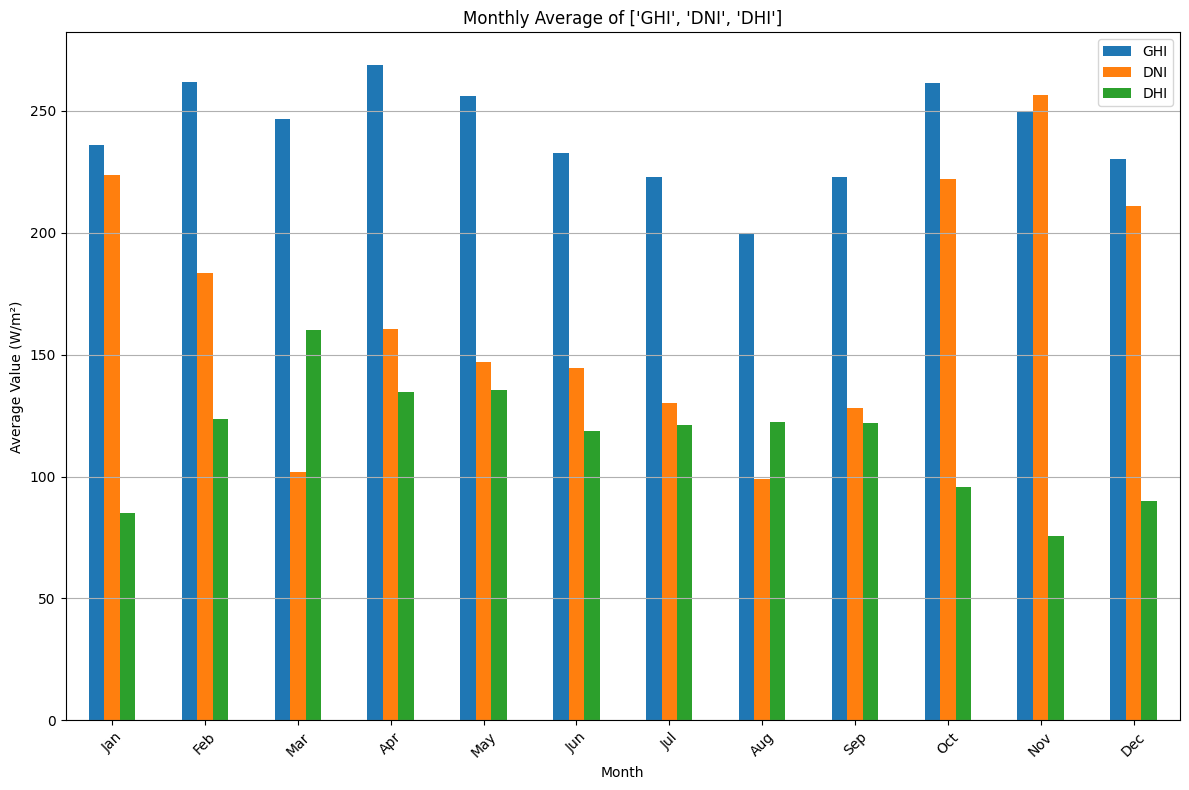

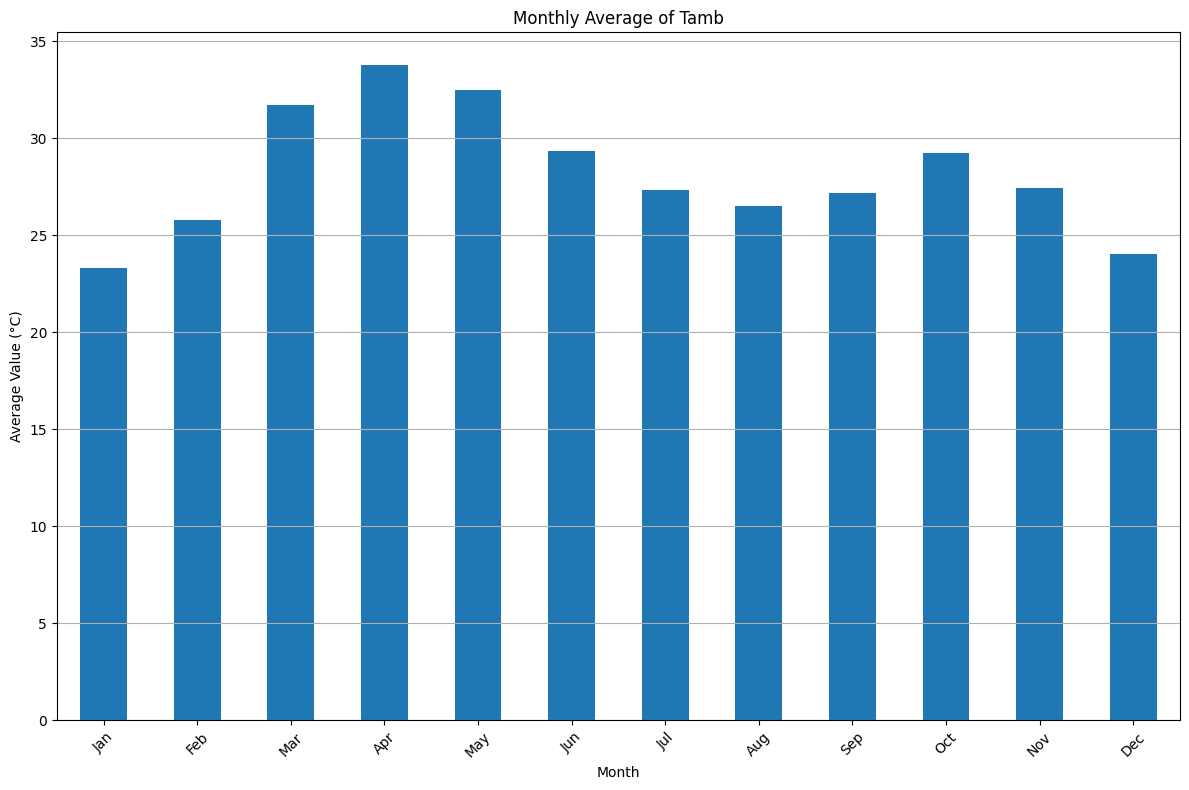

<Figure size 1000x600 with 0 Axes>

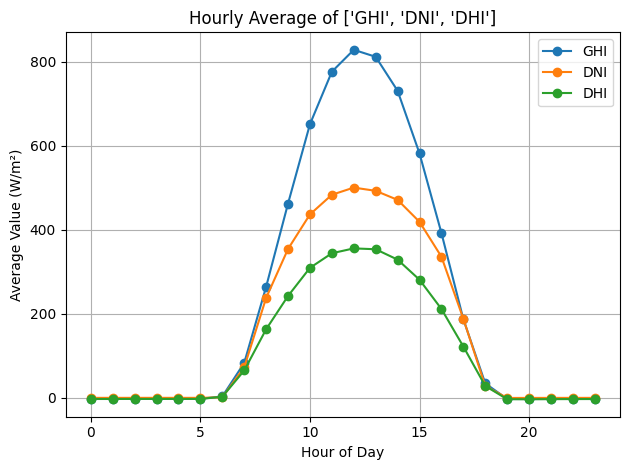

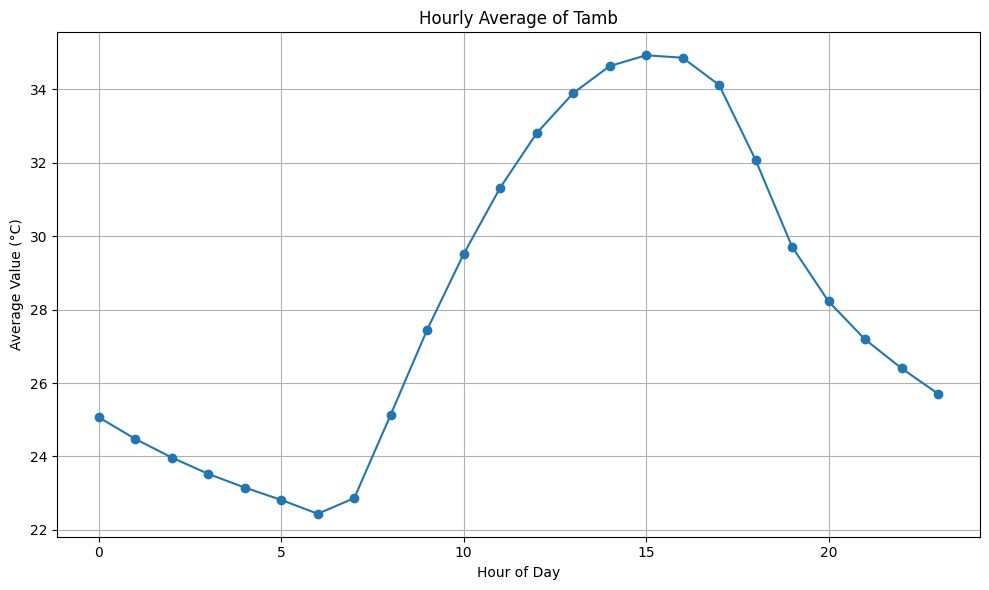

No data available for 2024-01-01.


In [5]:
import matplotlib.pyplot as plt

# Ensure the Timestamp column is properly parsed as datetime
if "Timestamp" not in data.columns or not pd.api.types.is_datetime64_any_dtype(data["Timestamp"]):
    print("Timestamp column is missing or not in datetime format.")
    exit()

# Extract useful time components for analysis
data["Month"] = data["Timestamp"].dt.month
data["Hour"] = data["Timestamp"].dt.hour
data["Date"] = data["Timestamp"].dt.date

# List of columns to analyze
columns_to_name = ["GHI (W/m²)", "DNI (W/m²)", "DHI (W/m²)", "Tamb (°C)"]
columns_to_analyze = ["GHI", "DNI", "DHI", "Tamb"]

# Plot for monthly averages 
monthly_avg = data.groupby("Month")[columns_to_analyze[0:3]].mean()
plt.figure(figsize=(10, 6))
monthly_avg.plot(kind="bar", figsize=(12, 8))
plt.title(f"Monthly Average of {columns_to_analyze[0:3]}")
plt.xlabel("Month")
plt.ylabel("Average Value (W/m²)")
plt.xticks(range(0, 12), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                                    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=45)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

# Plot for monthly averages for Ambient Temperature
monthly_avg = data.groupby("Month")[columns_to_analyze[3]].mean()
plt.figure(figsize=(10, 6))
monthly_avg.plot(kind="bar", figsize=(12, 8))
plt.title(f"Monthly Average of {columns_to_analyze[3]}")
plt.xlabel("Month")
plt.ylabel("Average Value (°C)")
plt.xticks(range(0, 12), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                                    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=45)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

# Plot for hourly averages GHI, DNI, DHI 

hourly_avg = data.groupby("Hour")[columns_to_analyze[0:3]].mean()
plt.figure(figsize=(10, 6))
hourly_avg.plot(kind="line", marker="o" )
plt.title(f"Hourly Average of {columns_to_analyze[0:3]}")
plt.xlabel("Hour of Day")
plt.ylabel("Average Value (W/m²)")
plt.grid(axis="both")
plt.tight_layout()
plt.show()

# Plot for hourly averages ambient temperature

hourly_avg = data.groupby("Hour")[columns_to_analyze[3]].mean()
plt.figure(figsize=(10, 6))
hourly_avg.plot(kind="line", marker="o" )
plt.title(f"Hourly Average of {columns_to_analyze[3]}")
plt.xlabel("Hour of Day")
plt.ylabel("Average Value (°C)")
plt.grid(axis="both")
plt.tight_layout()
plt.show()

# Plot for a specific date to observe anomalies (separate plots for each column)
specific_date = "2024-01-01"  # Replace with any date in your dataset
specific_day_data = data[data["Date"] == pd.to_datetime(specific_date).date()]

if not specific_day_data.empty:
    for column in columns_to_analyze:
        plt.figure(figsize=(10, 6))
        plt.plot(specific_day_data["Timestamp"], specific_day_data[column], marker="o", label=column)
        plt.title(f"Time Series of {column} on {specific_date}")
        plt.xlabel("Timestamp")
        plt.ylabel("Value")
        plt.legend()
        plt.grid(axis="both")
        plt.tight_layout()
        plt.show()
else:
    print(f"No data available for {specific_date}.")


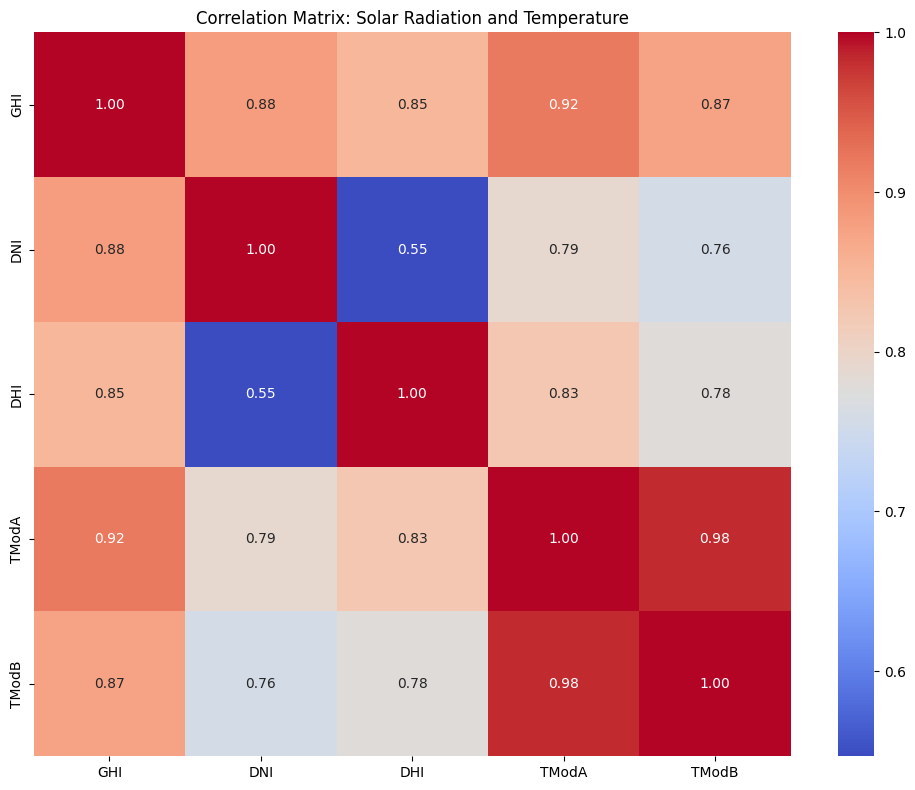

<Figure size 1200x1200 with 0 Axes>

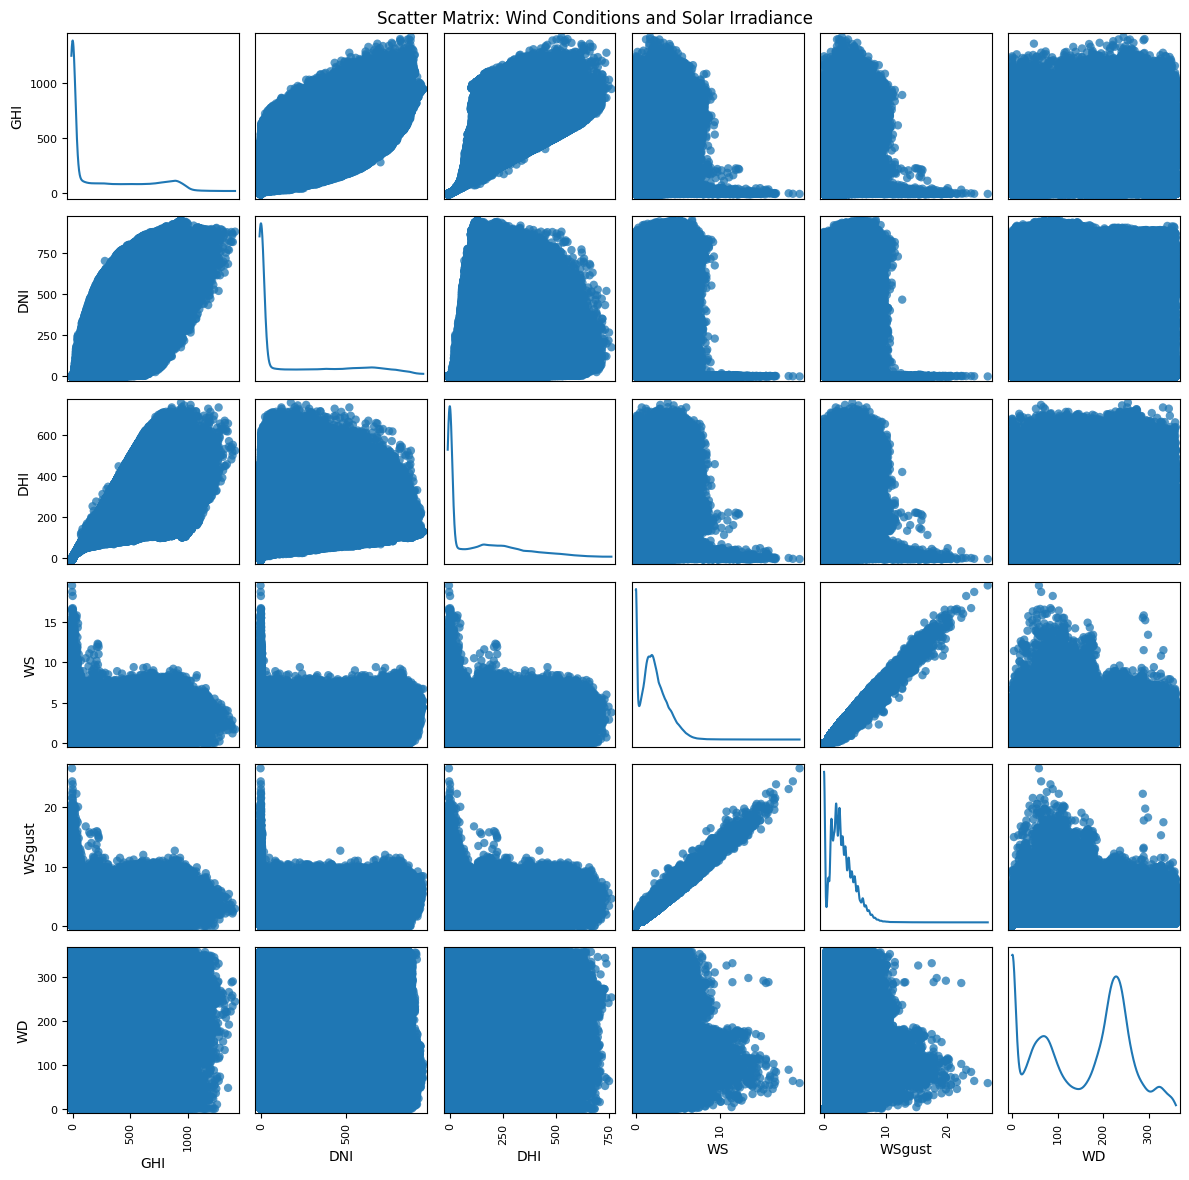

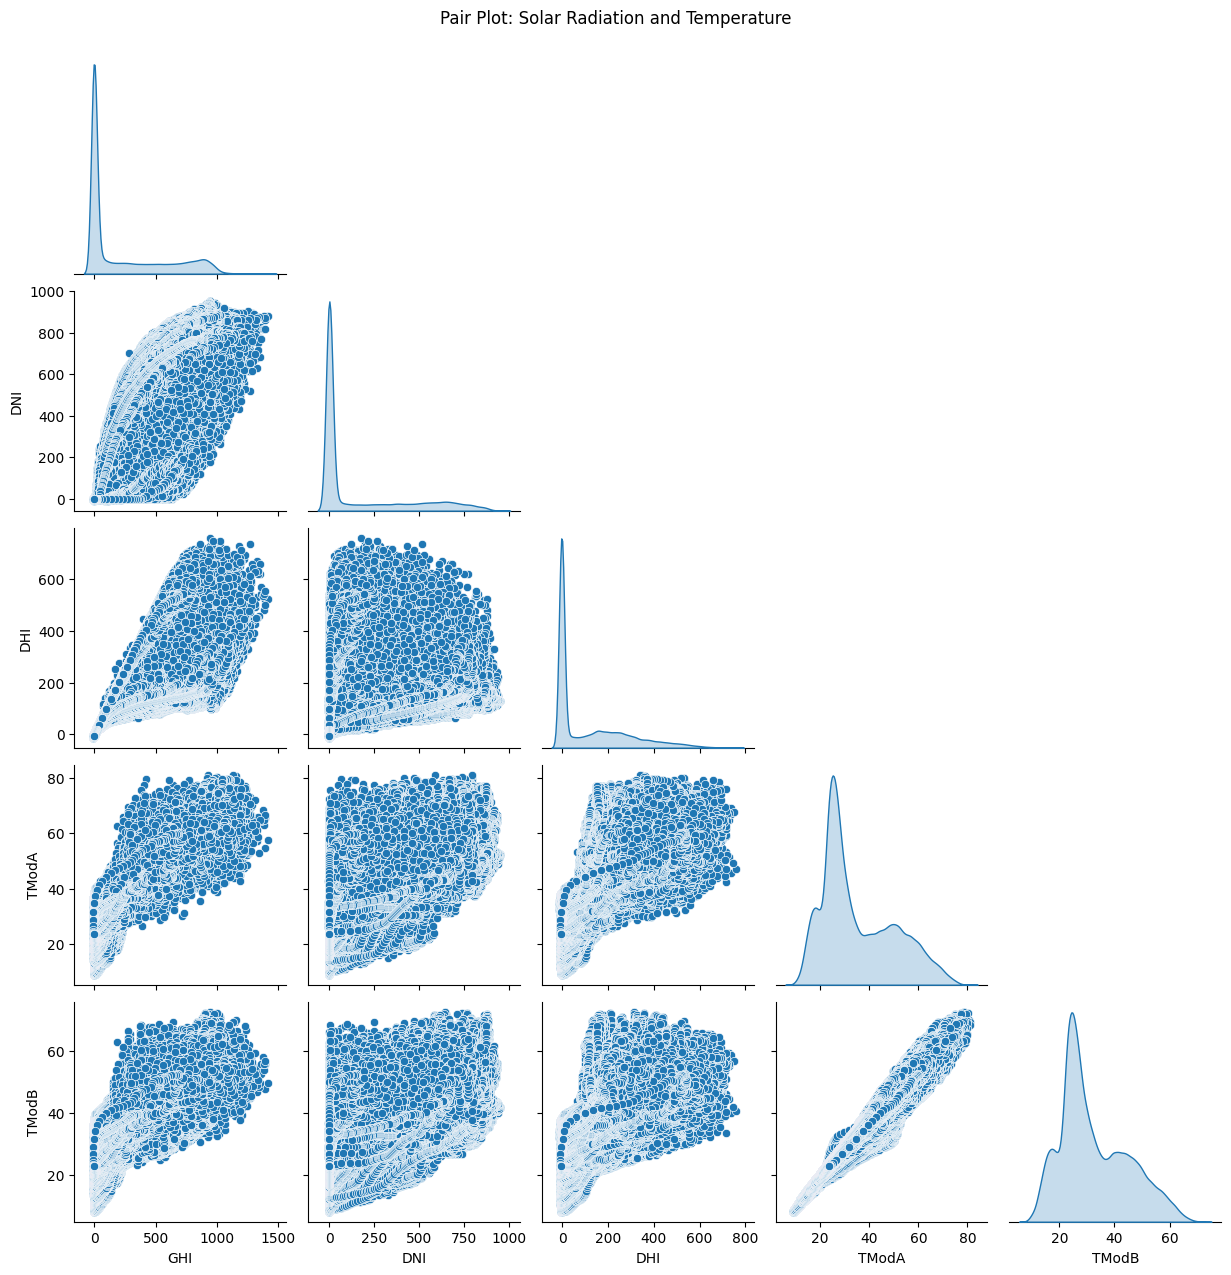

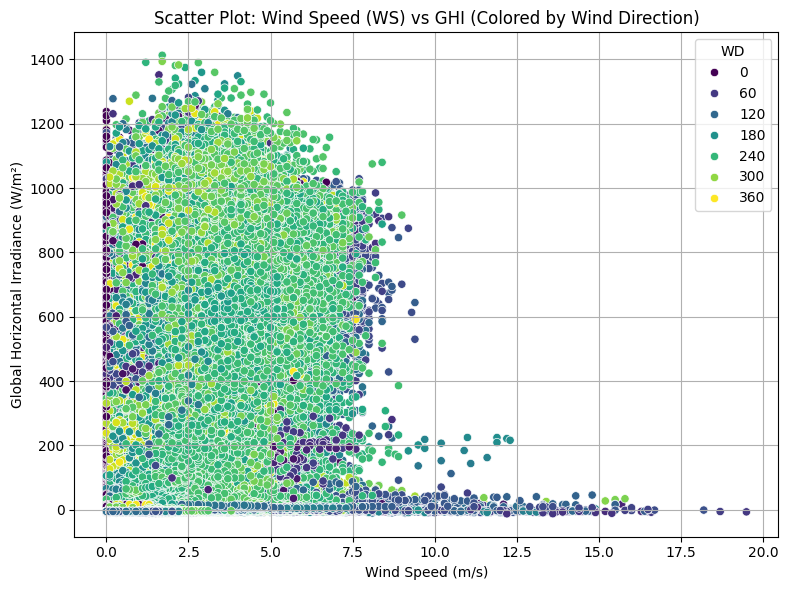

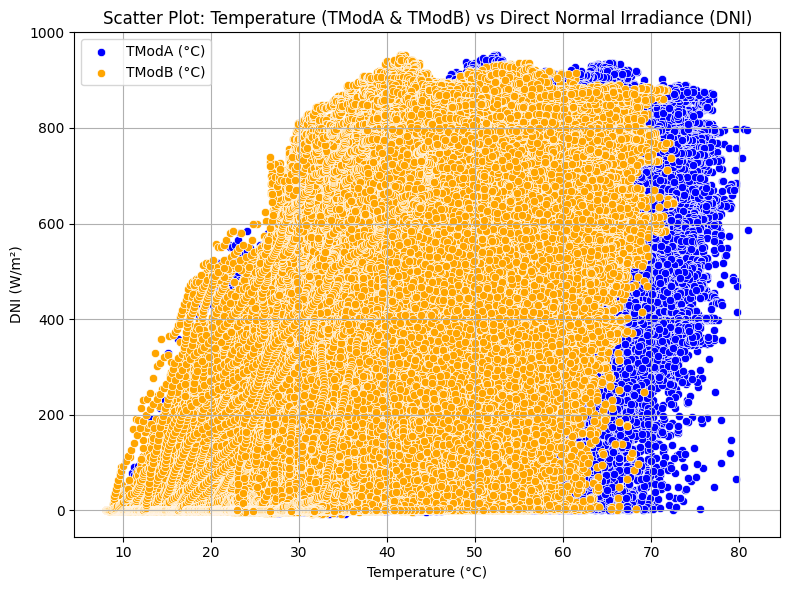

In [8]:

import seaborn as sns
from pandas.plotting import scatter_matrix


# Variables for correlation analysis
solar_radiation = ["GHI", "DNI", "DHI"]
temperature_measures = ["TModA", "TModB"]
wind_conditions = ["WS", "WSgust", "WD"]
all_vars = solar_radiation + temperature_measures + wind_conditions

# Check if all variables exist in the data
missing_vars = [col for col in all_vars if col not in data.columns]
if missing_vars:
    print(f"Missing columns: {missing_vars}")
    exit()

# --- Correlation Matrix and Heatmap (Solar Radiation and Temperature) ---
correlation_solar_temp = data[solar_radiation + temperature_measures].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_solar_temp, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Matrix: Solar Radiation and Temperature")
plt.tight_layout()
plt.show()

# --- Scatter Matrix for Wind Conditions and Solar Irradiance ---
wind_solar_vars = solar_radiation + wind_conditions

plt.figure(figsize=(12, 12))
scatter_matrix(data[wind_solar_vars], alpha=0.75, figsize=(12, 12), diagonal="kde", marker="o")
plt.suptitle("Scatter Matrix: Wind Conditions and Solar Irradiance")
plt.tight_layout()
plt.show()

# --- Pair Plot for Solar Radiation and Temperature ---
pair_plot_data = data[solar_radiation + temperature_measures]

sns.pairplot(pair_plot_data, kind="scatter", diag_kind="kde", corner=True)
plt.suptitle("Pair Plot: Solar Radiation and Temperature", y=1.02)
plt.show()

# --- Additional Insightful Plots ---
# Wind speed (WS) vs GHI
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x="WS", y="GHI", hue="WD", palette="viridis")
plt.title("Scatter Plot: Wind Speed (WS) vs GHI (Colored by Wind Direction)")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Global Horizontal Irradiance (W/m²)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Temperature (TModA and TModB) vs DNI
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x="TModA", y="DNI", label="TModA (°C)", color="blue")
sns.scatterplot(data=data, x="TModB", y="DNI", label="TModB (°C)", color="orange")
plt.title("Scatter Plot: Temperature (TModA & TModB) vs Direct Normal Irradiance (DNI)")
plt.xlabel("Temperature (°C)")
plt.ylabel("DNI (W/m²)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
